# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Ivan Sholana
- **Email:** ivansholana@gmail.com
- **ID Dicoding:** Ivan Sholana

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara tingkat polusi udara (terutama PM2.5 dan PM10) dengan variabel lingkungan lainnya seperti suhu udara, tekanan udara, dan kelembaban udara.

- Bagaimana pola polusi udara berubah dari waktu ke waktu di berbagai stasiun pengukuran? Apakah ada tren peningkatan atau penurunan polusi udara dari tahun ke tahun di stasiun-stasiun tersebut? Pertanyaan ini mengarah pada analisis pola dan tren dari data polusi udara dalam rentang waktu tertentu di berbagai stasiun pengukuran, yang dapat memberikan wawasan mengenai perkembangan polusi udara dan memberikan dasar bagi tindakan yang relevan dalam pengelolaan lingkungan.

## Import Semua Packages/Library yang Digunakan

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [110]:
dataset_path = "dataset/Air-quality-dataset"
csv_files = [file for file in os.listdir(dataset_path) if file.endswith('.csv')]

all_data = []

for file in csv_files:
    df = pd.read_csv(os.path.join(dataset_path,file))
    all_data.append(df)
    
air_quality = pd.concat(all_data,ignore_index=True)
    

In [111]:
air_quality.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Assessing Data

In [112]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [113]:
print(f"null value :\n{air_quality.isnull().sum()}")

null value :
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


In [114]:
print(f"\nnull value (percentage) :\n{air_quality.isnull().sum() / air_quality.shape[0] * 100}")


null value (percentage) :
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64


In [115]:
air_quality.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [116]:
air_quality.duplicated().sum()

0

### Cleaning Data

In [117]:
air_quality['datetime'] = pd.to_datetime(air_quality[['year', 'month', 'day', 'hour']])

In [118]:
air_quality.drop(columns=['No'],inplace=True)

In [119]:
air_quality.set_index('datetime',inplace=True)

In [120]:
air_quality.interpolate('time',inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16336\4073785895.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  air_quality.interpolate('time',inplace=True)


In [121]:
air_quality['wd'].ffill(inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16336\1223827965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_quality['wd'].ffill(inplace=True)


In [143]:
air_quality.reset_index(inplace=True)

In [122]:
air_quality.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     420768 non-null  int64  
 1   month    420768 non-null  int64  
 2   day      420768 non-null  int64  
 3   hour     420768 non-null  int64  
 4   PM2.5    420768 non-null  float64
 5   PM10     420768 non-null  float64
 6   SO2      420768 non-null  float64
 7   NO2      420768 non-null  float64
 8   CO       420768 non-null  float64
 9   O3       420768 non-null  float64
 10  TEMP     420768 non-null  float64
 11  PRES     420768 non-null  float64
 12  DEWP     420768 non-null  float64
 13  RAIN     420768 non-null  float64
 14  wd       420768 non-null  object 
 15  WSPM     420768 non-null  float64
 16  station  420768 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 57.8+ MB


In [144]:
air_quality.head()

,datetime,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [124]:
air_quality2 = air_quality.drop(columns=['year','month','day','hour'])

In [133]:
station = air_quality2.station.unique().tolist()
feature = air_quality2.select_dtypes('number').columns.to_list()

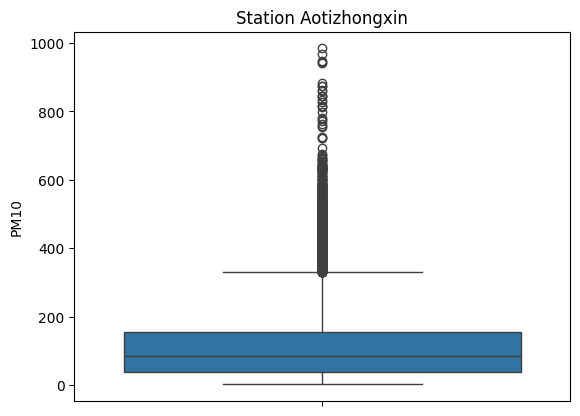

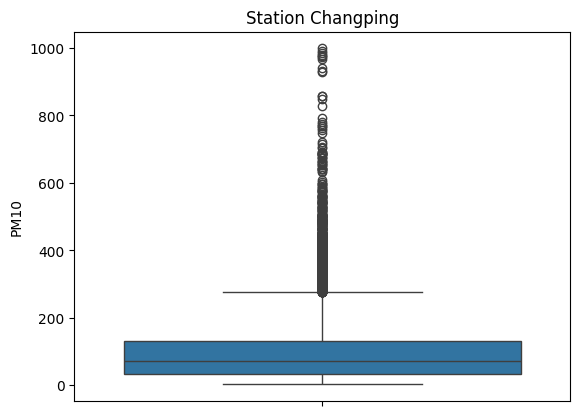

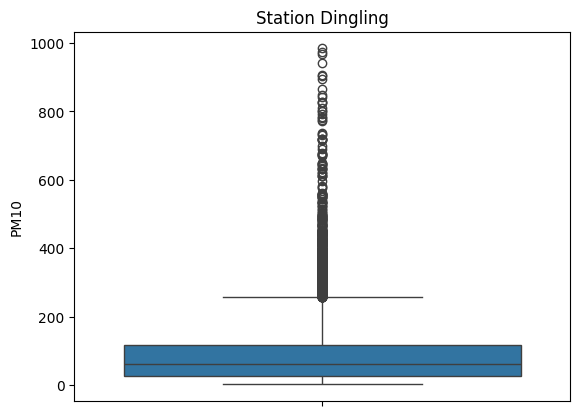

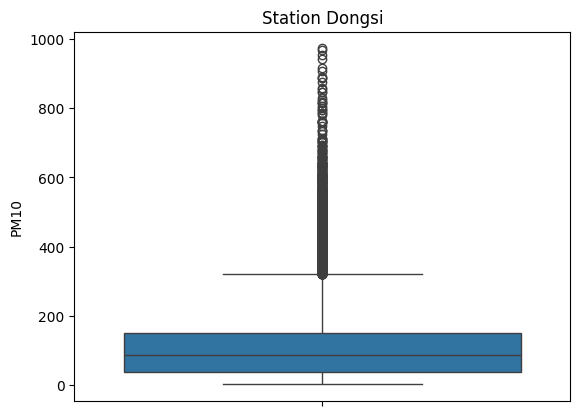

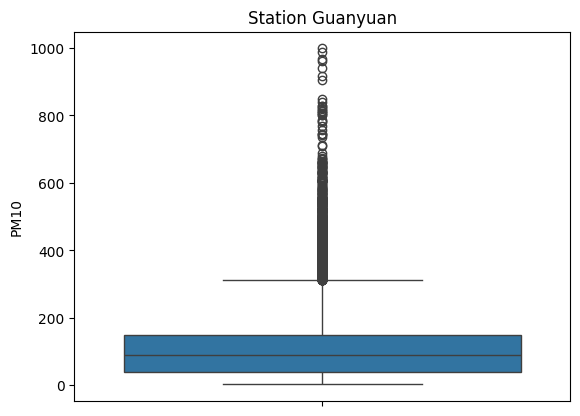

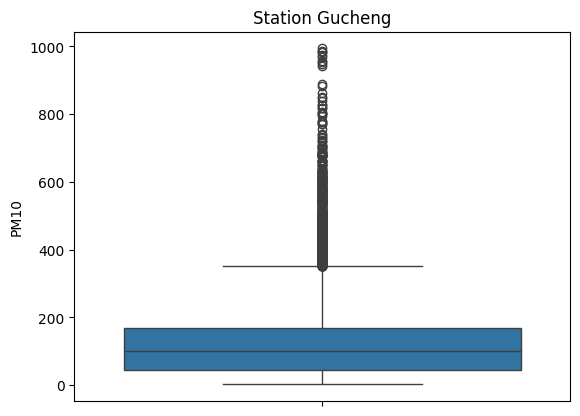

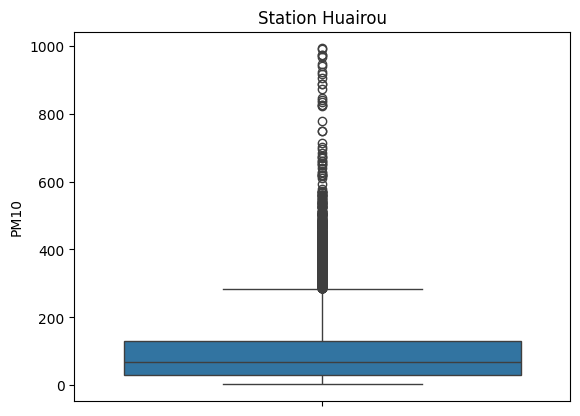

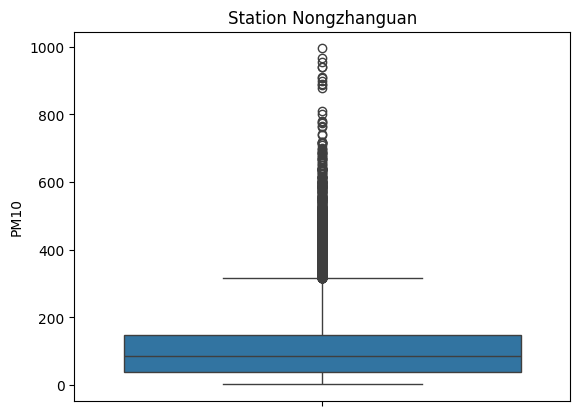

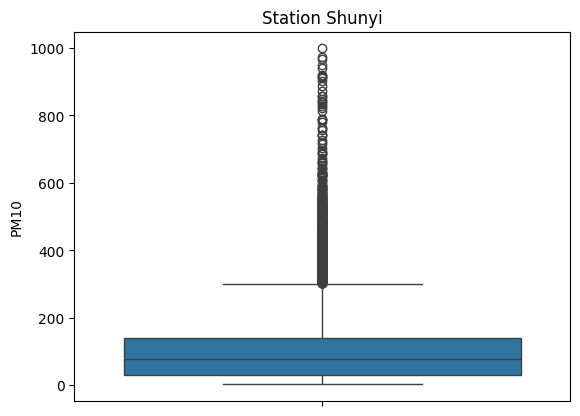

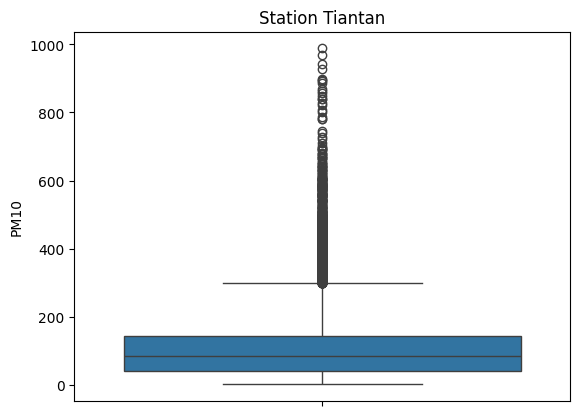

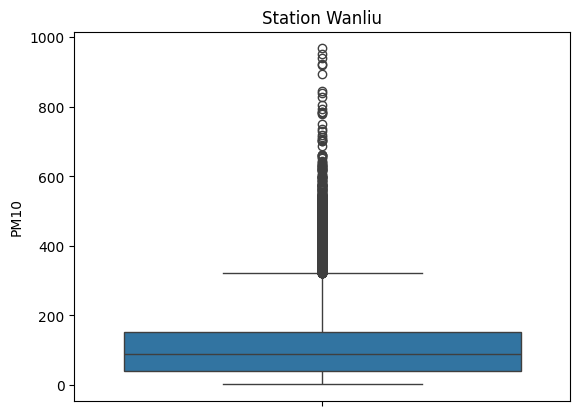

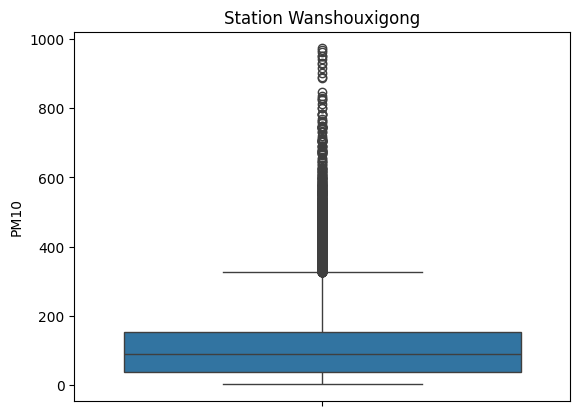

In [137]:
for i in station:
    sns.boxplot(air_quality.loc[air_quality['station'] == i,feature[1]])
    plt.title(f"Station {i}")
    plt.show()

Terlalu banyak outlier dan data juga berupa timeseries sehingga rawan untuk dihilangkan

## Exploratory Data Analysis (EDA)

### Explore ...

- Bagaimana hubungan antara tingkat polusi udara (terutama PM2.5 dan PM10) dengan variabel lingkungan lainnya seperti suhu udara, tekanan udara, dan kelembaban udara.

In [140]:
air_quality['datetime']

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
2017-02-28 20:00:00,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
2017-02-28 21:00:00,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong


In [149]:
air_quality['datetime'] = pd.to_datetime(air_quality[['year', 'month', 'day']])

In [154]:
air_quality.select_dtypes('number').corr()['PM2.5']

year    -0.027728
month    0.007611
day      0.006264
hour     0.011074
PM2.5    1.000000
PM10     0.878339
SO2      0.484042
NO2      0.664865
CO       0.786572
O3      -0.150418
TEMP    -0.131318
PRES     0.019609
DEWP     0.114116
RAIN    -0.014443
WSPM    -0.272581
Name: PM2.5, dtype: float64

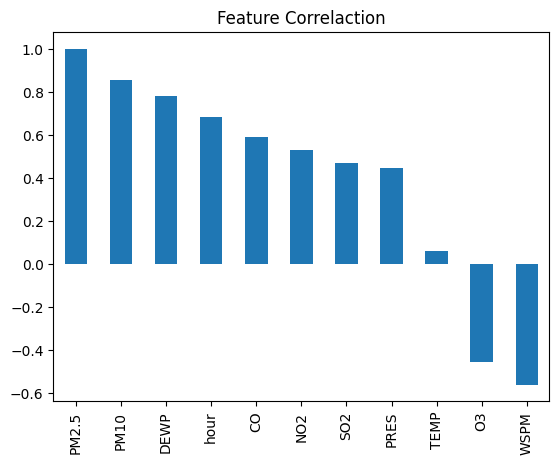

In [151]:
plt.title("Feature Correlaction")
air_quality.loc[(air_quality['datetime'] == '2013-03-01') & (air_quality['station'] == 'Aotizhongxin')].select_dtypes('number').corr()['PM2.5'].sort_values(ascending=False).dropna().plot(kind='bar')

plt.show()

Berdasarkan analisis korelasi antara PM2.5 dengan variabel lain dalam DataFrame `air_quality`, dapat disimpulkan bahwa PM2.5 memiliki keterkaitan yang erat dengan polusi udara yang disebabkan oleh partikel-partikel berukuran kecil. Korelasi positif yang signifikan dengan PM10, SO2, NO2, dan CO menunjukkan bahwa peningkatan kadar polutan ini berpotensi meningkatkan tingkat PM2.5 di udara. Sebaliknya, korelasi negatif yang diamati dengan O3 dan suhu (TEMP) menandakan bahwa peningkatan kadar ozon dan suhu udara cenderung mengurangi tingkat PM2.5. Hal ini menggambarkan kompleksitas pola polusi udara dan pengaruh berbagai faktor terhadap tingkat PM2.5. Oleh karena itu, pemantauan dan kontrol polusi udara yang berkelanjutan perlu dilakukan untuk mengurangi tingkat PM2.5 dan menjaga kualitas udara yang baik bagi kesehatan manusia dan lingkungan.

- Bagaimana pola polusi udara berubah dari waktu ke waktu di berbagai stasiun pengukuran? Apakah ada tren peningkatan atau penurunan polusi udara dari tahun ke tahun di stasiun-stasiun tersebut? Pertanyaan ini mengarah pada analisis pola dan tren dari data polusi udara dalam rentang waktu tertentu di berbagai stasiun pengukuran, yang dapat memberikan wawasan mengenai perkembangan polusi udara dan memberikan dasar bagi tindakan yang relevan dalam pengelolaan lingkungan.

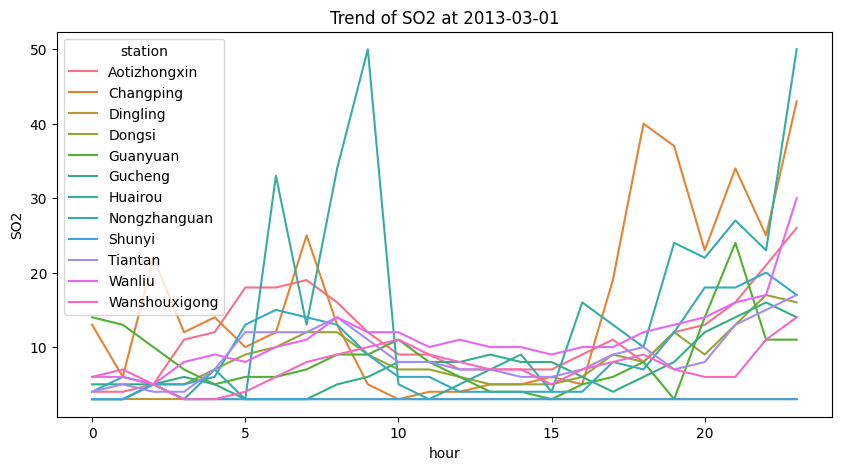

In [156]:
filtered_data = air_quality.loc[(air_quality['datetime'] =='2013-03-01')]

plt.figure(figsize=(10,5))
plt.title("Trend of SO2 at 2013-03-01")
sns.lineplot(y=filtered_data['SO2'],x=filtered_data['hour'],hue=filtered_data['station'])
plt.show()

Terdapat trend yang nampak jelas yaitu terjadi peningkatan SO2 antara jam 5 hingga 10 pada semua statsiun dan berlanjut dengan penurunan secara kompak pada pukul 10 - 15. Namun, pada pukul 15 ke atas nampak secara nyata bahwa setiap statsiun mengalami peningkatan SO2